In [15]:
import os
import plaid
import requests
import datetime
import json
from pandas.plotting import table 
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
%matplotlib inline

In [16]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [17]:
load_dotenv()

PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [18]:
INSTITUTION_ID = "ins_109508"

In [19]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, 
                      public_key=PLAID_PUBLIC_KEY, environment=PLAID_ENV)

### 2. Generate a public token

In [20]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, [PLAID_PRODUCTS])

### 3. Exchange the public token for an access token

In [21]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [22]:
# YOUR CODE HERE
client.Accounts.get(access_token)


{'accounts': [{'account_id': '6zxPedgMa5Tg6b3jyd4Nh9k7blj66LtgPm69m',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'XaqMgB8l46SoZAlXKpwyhGLg6JdyyeCdv9Q6D',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'DMpW1V83g6SGeW58a61yH5XevD3JJbcvL71wd',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [35]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transaction_response = client.Transactions.get(access_token,start_date,end_date)
print(json.dumps(transaction_response['transactions'][2],indent=4, sort_keys=True))
print(len (transaction_response['transactions']))

{
    "account_id": "wNypbJKBdwHq1oVW6rzNswvbK3EBB9hr13GNd",
    "account_owner": null,
    "amount": 5850,
    "authorized_date": null,
    "category": [
        "Transfer",
        "Debit"
    ],
    "category_id": "21006000",
    "date": "2020-04-14",
    "iso_currency_code": "USD",
    "location": {
        "address": null,
        "city": null,
        "country": null,
        "lat": null,
        "lon": null,
        "postal_code": null,
        "region": null,
        "store_number": null
    },
    "name": "ACH Electronic CreditGUSTO PAY 123456",
    "payment_channel": "other",
    "payment_meta": {
        "by_order_of": null,
        "payee": null,
        "payer": null,
        "payment_method": "ACH",
        "payment_processor": null,
        "ppd_id": null,
        "reason": null,
        "reference_number": null
    },
    "pending": false,
    "pending_transaction_id": null,
    "transaction_code": null,
    "transaction_id": "or8jJ95glQTNmErVJvaQID9dbZGpp3cRV1j9v",
   

### 2. Print the categories for each transaction

In [49]:
# YOUR CODE HERE
categories=[]
category1=[]
category2=[]
category3=[]
dates=[]
names=[]
amounts=[]

for x in range(len(transaction_response['transactions'])):
    if len(transaction_response['transactions'][x]["category"])==1:
        category1.append(transaction_response['transactions'][x]["category"][0])
        category2.append('na')
        category3.append('na')
        categories.append(f'{transaction_response["transactions"][x]["category"][0]}, na, na')
    elif len(transaction_response['transactions'][x]["category"])==2:
        category1.append(transaction_response['transactions'][x]["category"][0])
        category2.append(transaction_response['transactions'][x]["category"][1])
        category3.append('na')
        categories.append(f'{transaction_response["transactions"][x]["category"][0]}, {transaction_response["transactions"][x]["category"][1]}, na')
    elif len(transaction_response['transactions'][x]["category"])==3:
        category1.append(transaction_response['transactions'][x]["category"][0])
        category2.append(transaction_response['transactions'][x]["category"][1])
        category3.append(transaction_response['transactions'][x]["category"][2])
        categories.append(f'{transaction_response["transactions"][x]["category"][0]}, {transaction_response["transactions"][x]["category"][1]}, {transaction_response["transactions"][x]["category"][2]}')
    
    dates.append(transaction_response['transactions'][x]["date"])
    names.append(transaction_response['transactions'][x]["name"])
    amounts.append(transaction_response['transactions'][x]["amount"])
    
transactions=pd.DataFrame((list(zip(dates, names, amounts, category1, category2, category3))),
                          columns =['date','name','amount (USD)','category','sub category 1','sub category2'])
trans_cat=pd.Series(categories)
trans_cat.value_counts()  
# fig, ax = plt.subplots(1,1)
# ax.xaxis.set_visible(False) 
# ax.yaxis.set_visible(False) 
# ax.set_frame_on(False) 
# table(ax, trans_cat.value_counts() ,rowLabels=['']*trans_cat.value_counts() .shape[0],loc='center')
# fig.savefig('./output/categories.png')




Food and Drink, Restaurants, na               6
Food and Drink, Restaurants, Fast Food        6
Travel, Taxi, na                              6
Travel, Airlines and Aviation Services, na    6
Recreation, Gyms and Fitness Centers, na      3
Shops, Sporting Goods, na                     3
Transfer, Credit, na                          3
Transfer, Deposit, na                         3
Payment, Credit Card, na                      3
Payment, na, na                               3
Food and Drink, Restaurants, Coffee Shop      3
Transfer, Debit, na                           3
dtype: int64

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [38]:
# YOUR CODE HERE
transactions=pd.DataFrame((list(zip(dates, names, amounts, category1, category2, category3))),
                          columns =['date','name','amount (USD)','category','sub category 1','sub category2'])
transactions

,date,name,amount (USD),category,sub category 1,sub category2
0,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment,Credit Card,na
1,2020-04-15,Uber,5.40,Travel,Taxi,na
2,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer,Debit,na
3,2020-04-14,CD DEPOSIT .INITIAL.,1000.00,Transfer,Deposit,na
4,2020-04-13,Touchstone Climbing,78.50,Recreation,Gyms and Fitness Centers,na
5,2020-04-13,United Airlines,-500.00,Travel,Airlines and Aviation Services,na
6,2020-04-12,McDonald's,12.00,Food and Drink,Restaurants,Fast Food
7,2020-04-12,Starbucks,4.33,Food and Drink,Restaurants,Coffee Shop
8,2020-04-11,SparkFun,89.40,Food and Drink,Restaurants,na
9,2020-04-10,INTRST PYMNT,-4.22,Transfer,Credit,na


In [26]:
# fig, ax = plt.subplots(1,1)
# ax.xaxis.set_visible(False) 
# ax.yaxis.set_visible(False) 
# ax.set_frame_on(False) 
# table(ax, transactions,rowLabels=['']*transactions.shape[0],loc='center')
# fig.savefig('./output/transactions.png')

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [39]:
transactions['date']=pd.to_datetime(transactions['date'])
transactions['amount (USD)'].astype('float')
transactions.set_index('date', inplace=True)
transactions.dtypes

name               object
amount (USD)      float64
category           object
sub category 1     object
sub category2      object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [29]:
# YOUR CODE HERE
income_response = client.Income.get(access_token)
lst=[['last_year_income_before_tax',income_response['income']['last_year_income_before_tax']],['monthly_income',income_response['income']['income_streams'][0]['monthly_income']],['projected_yearly_income_before_tax',income_response['income']['projected_yearly_income_before_tax']]]
inc=pd.DataFrame(lst)
inc.columns=['Income stream', 'income (USD)']
print(f"The previous year's gross revenues was ${income_response['income']['last_year_income_before_tax']}")
print(f"The monthly revenues are  ${income_response['income']['income_streams'][0]['monthly_income']}")
print(f"The next year's projected gross revenues is ${income_response['income']['projected_yearly_income_before_tax']}")
# fig, ax = plt.subplots(1,1)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False) 
# ax.set_frame_on(False) 
# table(ax, inc,rowLabels=['']*inc.shape[0],loc='center')
# fig.savefig('./output/inc.png')

The previous year's gross revenues was $7285
The monthly revenues are  $500
The next year's projected gross revenues is $7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [40]:
transaction_category=transactions.groupby('category').sum()
transaction_category.columns=['amount (USD)']
transaction_category
# fig, ax = plt.subplots(1,1)
# ax.xaxis.set_visible(False) 
# ax.yaxis.set_visible(False) 
# ax.set_frame_on(False) 
# table(ax, transaction_category,loc='center')
# fig.savefig('./output/transactions_by_cat.png')

,amount (USD)
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


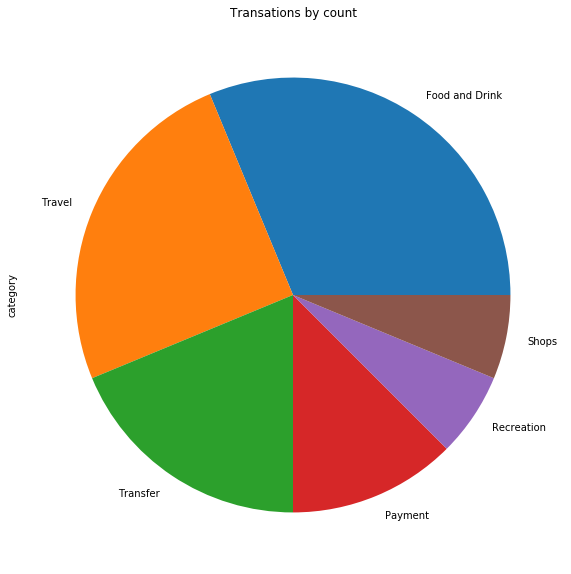

In [43]:
trans_count=transactions['category'].value_counts()
fig_trans_pie=trans_count.plot.pie(y='amount (USD)', figsize=(10,10), title='Transations by count')
fig_trans_pie.figure.savefig('./output/fig_trans_pie.jpg', bbox_inches='tight', dpi=150)

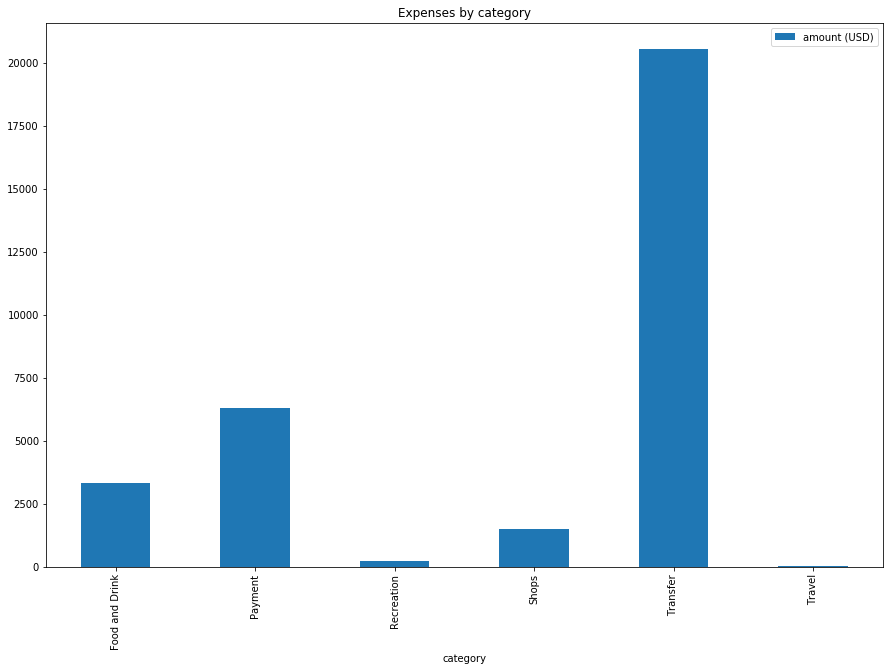

In [42]:
fig_trans_bar=transaction_category.plot(kind="bar",figsize=(15,10), title="Expenses by category")
# fig_trans_bar.figure.savefig('./output/fig_trans_bar.jpg', bbox_inches='tight', dpi=150)

### Calculate the expenses per month

In [44]:
transactions_months=transactions.groupby([transactions.index.year, transactions.index.month]).sum()
transactions_months.round({'amount (USD)':2})
transactions_months.columns=['Monthy transaction amound (USD)']
transactions_months
# fig, ax = plt.subplots(1,1)
# ax.xaxis.set_visible(False) 
# ax.yaxis.set_visible(False) 
# ax.set_frame_on(False) 
# table(ax, transactions_months,loc='center')
# fig.savefig('./output/transactions_months.png')

Monthy transaction amound (USD)
date date                                 
2020 1                             4084.83
     2                            10145.24
     3                            11145.24
     4                             6560.41

In [ ]:
fig_monthly=transactions_months.plot(kind="bar",figsize=(15,10), title="Expenses for last 90 Days")

# fig_monthly.figure.savefig('./output/fig_monthly.jpg', bbox_inches='tight', dpi=150)